$$V_0= \mathbb{I} + v(s)  \psi_0(s)$$ 
$$v(s) = e^{i s} -1$$
$$\psi_0 = \frac{1}{2} \mathbb{I} + \alpha_X X + \frac{E_0}{2}Z$$
$$\alpha_X^2 = \frac{1}{4} - \frac{E_0^2}{4}$$

## 1. Check that $\alpha_X^2 = \frac{1}{4} - \frac{E_0^2}{4}$ (correct)

In [2]:
import numpy as np
from scipy.linalg import expm
I = np.array([[1, 0], [0, 1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

In [3]:
E_0 = 0.6
s = 0.8
alpha_X = np.sqrt(1/4 - E_0**2/4)
psi_0 = 1/2*I + alpha_X*X + E_0/2*Z

In [4]:
psi_0.conj().T - psi_0

array([[0.-0.j, 0.-0.j],
       [0.-0.j, 0.-0.j]])

## 2. Check the first expansion of $\psi_1$ is correct

In [5]:
v = np.exp(1j*s)-1
psi_0_s = expm(-1j*s*Z)@psi_0@expm(1j*s*Z)
V_0 = I + v*psi_0_s

In [6]:
x_0 = -alpha_X * (1-np.cos(2*s))
y_0 = alpha_X * np.sin(2*s)
eta = x_0*X + y_0*Y

In [7]:
eta@psi_0@eta

array([[0.06586877-5.87822527e-18j, 0.00384667+1.31681366e-01j],
       [0.00384667-1.31681366e-01j, 0.26347508+2.35129011e-17j]])

In [8]:
1/2 *(x_0**2 + y_0**2) *I + alpha_X*(x_0**2 - y_0**2)*X + alpha_X*2*x_0*y_0*Y - E_0/2 * (x_0**2 + y_0**2)*Z

array([[0.06586877+0.j        , 0.00384667+0.13168137j],
       [0.00384667-0.13168137j, 0.26347508+0.j        ]])

In [9]:
op = (
    alpha_X * x_0 * I
    + (x_0 * 0.5 + 1j * y_0 * E_0 * 0.5) * X
    + (0.5 * y_0 - 1j * x_0 * E_0 * 0.5) * Y
    - 1j * y_0 * alpha_X * Z
)
op

array([[-0.16467192-0.15993178j, -0.08233596-0.07996589j],
       [-0.32934385+0.31986355j, -0.16467192+0.15993178j]])

In [10]:
op_2 = (
    alpha_X * x_0 * I
    + (x_0 * 0.5 - 1j * y_0 * E_0 * 0.5) * X
    + (0.5 * y_0 + 1j * x_0 * E_0 * 0.5) * Y
    + 1j * y_0 * alpha_X * Z
)

In [11]:
term1 = np.abs(1 + v)**2 * psi_0
term2 = np.abs(v)**2 * (eta @ psi_0 + psi_0 @ eta)
term3 = v * eta @ psi_0
term4 = np.conj(v) * psi_0 @ eta
term5 = np.abs(v)**2 * (eta @ psi_0 @ eta)

psi_1 = term1 + term2 + term3 + term4 + term5


In [12]:
psi_1

array([[0.9695234 +1.03121352e-17j, 0.10538157+1.35803174e-01j],
       [0.10538157-1.35803174e-01j, 0.0304766 +4.20181859e-17j]])

In [13]:
V_0 @ psi_0 @ V_0.conj().T

array([[0.9695234 -6.69451928e-17j, 0.10538157+1.35803174e-01j],
       [0.10538157-1.35803174e-01j, 0.0304766 -7.81366914e-19j]])

In [14]:
coeff_I = (
    0.5 * np.abs(1 + v)**2
    + 2 * np.abs(v)**2 * alpha_X * x_0
    + (v + np.conj(v)) * alpha_X * x_0
    + 0.5 * np.abs(v)**2 * (x_0**2 + y_0**2)
)

coeff_Z = (
    0.5 * np.abs(1 + v)**2 * E_0
    + (np.conj(v) - v) * 1j * alpha_X * y_0
    - 0.5 * np.abs(v)**2 * E_0 * (x_0**2 + y_0**2)
)

psi_1_diag = coeff_I * I  + coeff_Z * Z
psi_1_diag

array([[0.9695234+0.j, 0.       +0.j],
       [0.       +0.j, 0.0304766+0.j]])

In [15]:
psi_1

array([[0.9695234 +1.03121352e-17j, 0.10538157+1.35803174e-01j],
       [0.10538157-1.35803174e-01j, 0.0304766 +4.20181859e-17j]])

In [16]:
E_0/2 - 2*alpha_X**2*((1-np.cos(s))*(1-np.cos(2*s))*E_0 - np.sin(s)*np.sin(2*s))

np.float64(0.46952340048958574)

In [17]:
coeff_Z

np.complex128(0.46952340048958585+0j)

In [18]:
def delta_E_1(E_0, s):
    return  np.sin(s)**2 *(1-E_0**2)*((1-np.cos(s))*E_0 - np.cos(s))

In [19]:
E_0 = 0.8
E_1_list = []
s_list = np.linspace(0,np.pi/4*1.2,30)
alpha_X = np.sqrt(1/4 - E_0**2/4)
psi_0 = 1/2*I + alpha_X*X + E_0/2*Z
for s in s_list:
    E_1_list.append(delta_E_1(E_0, s))

In [20]:
delta_E_1_def = []
for s in s_list:
    v = np.exp(1j*s)-1
    psi_0_s = expm(-1j*s*Z)@psi_0@expm(1j*s*Z)
    V_0 = I + v*psi_0_s
    psi_1 = V_0 @ psi_0 @ V_0.conj().T
    delta_E_1_def.append(np.real((psi_1-psi_0)[1][1]))


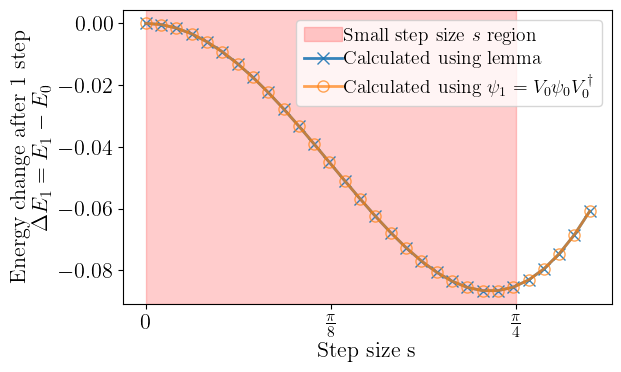

In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
# Plot config
plt.rcParams.update({
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'font.size': 16,
    'savefig.dpi': 75,
    'lines.linewidth': 2.0,
    'lines.markersize': 8,
    'legend.fontsize': 14,
    'legend.labelspacing': .3,
    'legend.columnspacing': .3,
    'legend.handletextpad': .1,
    'text.usetex': True,
    'font.family': "serif",
    'font.serif': "cm",
    'figure.figsize': [5, 3.5],
    'figure.autolayout': True
})
plt.figure(figsize=[6.5,4])

plt.axvspan(0, np.pi/4, alpha=0.2, color='red',label=r'Small step size $s$ region')
plt.plot(s_list,E_1_list,marker='x',alpha=0.9,label='Calculated using lemma')
plt.plot(s_list,delta_E_1_def,marker='o',markerfacecolor='none',alpha=0.7,label=r'Calculated using $\psi_1 = V_0 \psi_0 V_0^\dagger$')


plt.xlabel('Step size s')
plt.ylabel('Energy change after 1 step\n' + r'$\Delta E_1 = E_1-E_0$')


# Custom formatter
def pi_formatter(x, pos):
    fractions = {
        0: "0",
        np.pi/8: r"$\frac{\pi}{8}$",
        np.pi/4: r"$\frac{\pi}{4}$"
    }
    for key in fractions:
        if np.isclose(x, key):
            return fractions[key]
    return ""

# Set ticks
xticks = [0, np.pi/8, np.pi/4]
plt.legend(loc='upper right')
plt.xticks(xticks)
plt.gca().xaxis.set_major_formatter(FuncFormatter(pi_formatter))
plt.savefig('plots/energy_change.pdf', bbox_inches='tight')
plt.show()